Iantsa Provost et Bastien Soucasse – Groupe 5

# Projet d’ACID – 2 janvier 2022

[Sujet](https://masterinfo.emi.u-bordeaux.fr/wiki/lib/exe/fetch.php?media=mini_projet.pdf)

## Introduction

Afin de se lancer dans la comparaison des différents algorithmes de _Machine Learning_, il nous faut des données à exploiter en guise de test.

Commençons par importer les modules nécessaires au bon fonctionnement du projet.

In [1]:
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

On définit ensuite quelques constantes importantes.

In [2]:
NUM_CLASSES = 10
VERBOSE = True

On peut alors créer nos données à l’aide de **keras**.

x_train.shape = (60000, 28, 28)
y_train.shape = (60000, 10)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000, 10)
x_train[0]:


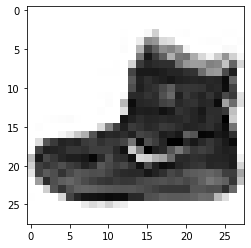

y_train[0] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
x_train[1]:


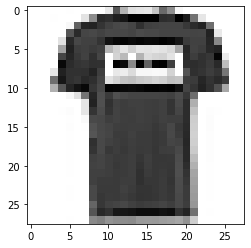

y_train[1] = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_train[2]:


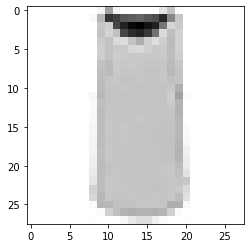

y_train[2] = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = utils.to_categorical(y_train, NUM_CLASSES), utils.to_categorical(y_test, NUM_CLASSES)

assert len(x_train.shape) == 3
assert len(x_test.shape) == 3
assert len(y_train.shape) == 2
assert len(y_test.shape) == 2

if (VERBOSE):
    print('x_train.shape =', x_train.shape)
    print('y_train.shape =', y_train.shape)
    print('x_test.shape =', x_test.shape)
    print('y_test.shape =', y_test.shape)

    NUM_EXAMPLES = 3

    for i in range(NUM_EXAMPLES):
        print('x_train[%d]:' % i)
        plt.imshow(x_train[i], cmap = cm.Greys)
        plt.show()
        print('y_train[%d] =' % i, y_train[i])

## Représentations des données

Pour permettre un traitement plus rapide des données, on peut utiliser des représentations différentes.

- Régression linéaire
- Analyse en composantes principales

## Classifications des données

Cette partie est dédiée concrètement au _Machine Learning_. Pour classifier les données on a plusieurs méthodes que l’on peut appliquer.

- k-Nearest Neighbors
- Bayes
- LDA

### k-Nearest Neightbors

Commençons par importer les modules nécessaires à la classification k-NN.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

On définit ensuite quelques constantes importantes.

In [5]:
K_VALS = range(1, 11)

On a également besoin d'applatir les données

In [6]:
flattened_x_train, flattened_x_test = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

assert len(flattened_x_train.shape) == 2
assert len(flattened_x_test.shape) == 2

if (VERBOSE):
    print('flattened_x_train.shape =', flattened_x_train.shape)
    print('flattened_x_test.shape =', flattened_x_test.shape)

flattened_x_train.shape = (60000, 784)
flattened_x_test.shape = (10000, 784)


On peut calculer les `score` pour un `k` donné.

In [7]:
knn_scores = {}

for k in K_VALS:
    if VERBOSE:
        print('Computing k-NN classification for k = %d…' % k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(flattened_x_train, y_train)
    knn_scores[k] = model.score(flattened_x_test, y_test)
    if VERBOSE:
        print('Mean accuracy for k = %d: %f.' % (k, knn_scores.get(k)))

Computing k-NN classification for k = 1…
Mean accuracy for k = 1: 0.849700.
Computing k-NN classification for k = 2…
Mean accuracy for k = 2: 0.763800.
Computing k-NN classification for k = 3…
Mean accuracy for k = 3: 0.845200.
Computing k-NN classification for k = 4…
Mean accuracy for k = 4: 0.796400.
Computing k-NN classification for k = 5…
Mean accuracy for k = 5: 0.838800.
Computing k-NN classification for k = 6…
Mean accuracy for k = 6: 0.805600.
Computing k-NN classification for k = 7…
Mean accuracy for k = 7: 0.836000.
Computing k-NN classification for k = 8…
Mean accuracy for k = 8: 0.808700.
Computing k-NN classification for k = 9…
Mean accuracy for k = 9: 0.831000.
Computing k-NN classification for k = 10…
Mean accuracy for k = 10: 0.809000.


On récupère ainsi le meilleur modèle de classification k-NN.

In [8]:
best_k = max(knn_scores, key=knn_scores.get)

print('Best k-NN model:')
print('  - Number of neighbors: %d.' % best_k)
print('  - Mean accuracy: %.2f%%.' % (knn_scores.get(best_k) * 100))

Best k-NN model:
  - Number of neighbors: 1.
  - Mean accuracy: 84.97%.


On remarque alors que le meilleur modèle de classification k-NN est celui dont le `k` est égal à 1 et sa précision est de 85%.

### Bayes

### LDA